In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/movies-on-netflix-prime-video-hulu-and-disney/MoviesOnStreamingPlatforms.csv


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from scipy.stats import ttest_ind,mannwhitneyu
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder

In [4]:
movies_data = pd.read_csv('/kaggle/input/movies-on-netflix-prime-video-hulu-and-disney/MoviesOnStreamingPlatforms.csv')
movies_data

,Unnamed: 0,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,The Irishman,2019,18+,98/100,1,0,0,0,0
1,1,2,Dangal,2016,7+,97/100,1,0,0,0,0
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,0
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0,0
4,4,5,Roma,2018,18+,94/100,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9510,9510,9511,Most Wanted Sharks,2020,NaN,14/100,0,0,0,1,0
9511,9511,9512,Doc McStuffins: The Doc Is In,2020,NaN,13/100,0,0,0,1,0
9512,9512,9513,Ultimate Viking Sword,2019,NaN,13/100,0,0,0,1,0
9513,9513,9514,Hunt for the Abominable Snowman,2011,NaN,10/100,0,0,0,1,0


In [5]:
movies_data.head()

,Unnamed: 0,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,The Irishman,2019,18+,98/100,1,0,0,0,0
1,1,2,Dangal,2016,7+,97/100,1,0,0,0,0
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,0
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0,0
4,4,5,Roma,2018,18+,94/100,1,0,0,0,0


In [6]:
movies_data.tail()

,Unnamed: 0,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
9510,9510,9511,Most Wanted Sharks,2020,NaN,14/100,0,0,0,1,0
9511,9511,9512,Doc McStuffins: The Doc Is In,2020,NaN,13/100,0,0,0,1,0
9512,9512,9513,Ultimate Viking Sword,2019,NaN,13/100,0,0,0,1,0
9513,9513,9514,Hunt for the Abominable Snowman,2011,NaN,10/100,0,0,0,1,0
9514,9514,9515,Women of Impact: Changing the World,2019,7+,10/100,0,0,0,1,0


In [7]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9515 entries, 0 to 9514
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       9515 non-null   int64 
 1   ID               9515 non-null   int64 
 2   Title            9515 non-null   object
 3   Year             9515 non-null   int64 
 4   Age              5338 non-null   object
 5   Rotten Tomatoes  9508 non-null   object
 6   Netflix          9515 non-null   int64 
 7   Hulu             9515 non-null   int64 
 8   Prime Video      9515 non-null   int64 
 9   Disney+          9515 non-null   int64 
 10  Type             9515 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 817.8+ KB


In [8]:
movies_data.nunique()

Unnamed: 0         9515
ID                 9515
Title              9515
Year                103
Age                   5
Rotten Tomatoes      85
Netflix               2
Hulu                  2
Prime Video           2
Disney+               2
Type                  1
dtype: int64

In [9]:
movies_data.isnull().sum()

Unnamed: 0            0
ID                    0
Title                 0
Year                  0
Age                4177
Rotten Tomatoes       7
Netflix               0
Hulu                  0
Prime Video           0
Disney+               0
Type                  0
dtype: int64

In [10]:
(movies_data.isnull().sum()/(len(movies_data)))*100

Unnamed: 0          0.000000
ID                  0.000000
Title               0.000000
Year                0.000000
Age                43.899107
Rotten Tomatoes     0.073568
Netflix             0.000000
Hulu                0.000000
Prime Video         0.000000
Disney+             0.000000
Type                0.000000
dtype: float64

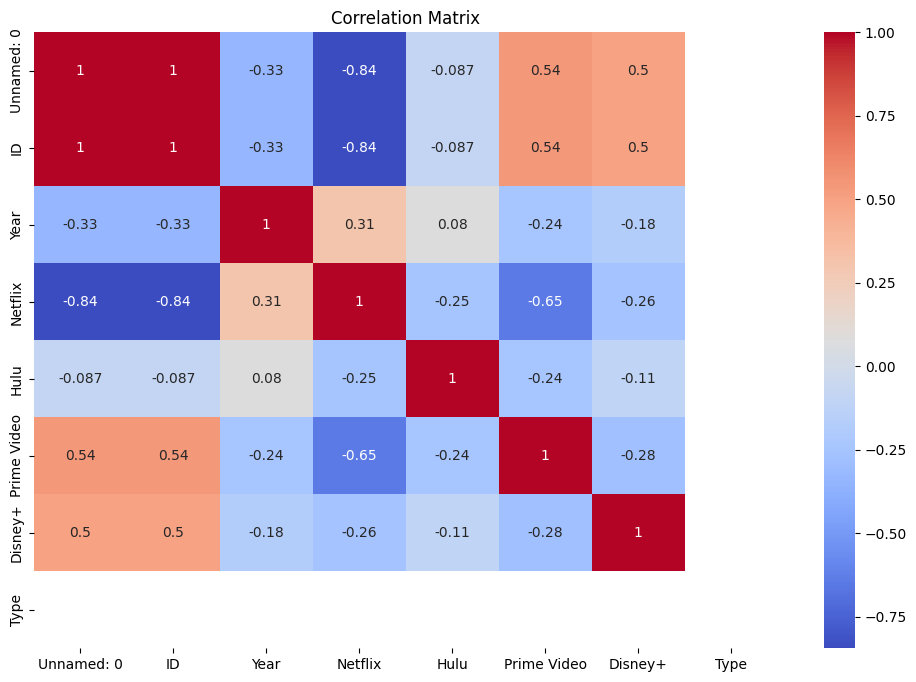

In [11]:
numeric_cols = movies_data.select_dtypes(include=['float64', 'int64'])

# Correlation matrix
corr = numeric_cols.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [12]:
movies_data.drop_duplicates(inplace=True)

In [13]:
movies_data['Age'] = movies_data['Age'].fillna('Unknown')
movies_data['Age'] = movies_data['Age'].replace({
    'all': 'All Ages', '7+': '7+', '13+': '13+', '16+': '16+', '18+': '18+'})

In [14]:
age_mapping = {'All Ages': 0, '7+': 1, '13+': 2, '16+': 3, '18+': 4, 'Unknown': np.nan}
movies_data['Age_mapped'] = movies_data['Age'].map(age_mapping)

In [15]:
movies_data['Rotten Tomatoes'] = (
    movies_data['Rotten Tomatoes']
    .str.extract(r'(\d+)')  # Extract numeric part
    .astype(float)          # Convert to float
)

movies_data['Rotten Tomatoes'].fillna(movies_data['Rotten Tomatoes'].median(), inplace=True)


In [16]:
movies_data['Platform'] = movies_data.apply(
    lambda x: 'Netflix' if x['Netflix'] == 1 else ('Disney+' if x['Disney+'] == 1 else 'Other'), axis=1)

In [17]:
movies_filtered = movies_data[movies_data['Platform'].isin(['Netflix', 'Disney+'])]

In [18]:
netflix_movies = movies_filtered[movies_filtered['Platform'] == 'Netflix']
netflix_scores = netflix_movies['Rotten Tomatoes'].dropna()

mean_netflix = np.mean(netflix_scores)
median_netflix = np.median(netflix_scores)
variance_netflix = np.var(netflix_scores, ddof=1)
std_dev_netflix = np.sqrt(variance_netflix)


In [19]:
print("Netflix Rotten Tomatoes Scores:\n")
print(f"Mean: {mean_netflix:.2f}, Median: {median_netflix:.2f}, Variance: {variance_netflix:.2f}, Standard Deviation: {std_dev_netflix:.2f}")

Netflix Rotten Tomatoes Scores:

Mean: 54.44, Median: 53.00, Variance: 191.40, Standard Deviation: 13.83


In [20]:
disney_movies = movies_filtered[movies_filtered['Platform'] == 'Disney+']
disney_scores = disney_movies['Rotten Tomatoes'].dropna()

mean_disney = np.mean(disney_scores)
median_disney = np.median(disney_scores)
variance_disney = np.var(disney_scores, ddof=1)
std_dev_disney = np.sqrt(variance_disney)

In [21]:
print("\nDisney+ Rotten Tomatoes Scores:\n")
print(f"Mean: {mean_disney:.2f}, Median: {median_disney:.2f}, Variance: {variance_disney:.2f}, Standard Deviation: {std_dev_disney:.2f}")


Disney+ Rotten Tomatoes Scores:

Mean: 58.30, Median: 57.50, Variance: 195.39, Standard Deviation: 13.98


In [22]:
print("\nSummary Statistics by Platform:")
print(movies_filtered.groupby('Platform')[['Age', 'Rotten Tomatoes']].describe())



Summary Statistics by Platform:
         Rotten Tomatoes                                                    
                   count       mean        std   min   25%   50%   75%   max
Platform                                                                    
Disney+            916.0  58.304585  13.978282  10.0  48.0  57.5  68.0  96.0
Netflix           3695.0  54.443302  13.834898  10.0  45.0  53.0  63.0  98.0


In [23]:
t_stat, p_value = stats.ttest_ind(netflix_scores, disney_scores, equal_var=False)
print(f"\nHypothesis Test (Netflix vs Disney+ Rotten Tomatoes):\nT-Statistic = {t_stat:.2f}, P-Value = {p_value:.4f}")


Hypothesis Test (Netflix vs Disney+ Rotten Tomatoes):
T-Statistic = -7.50, P-Value = 0.0000


In [24]:
X = movies_filtered[['Age_mapped', 'Rotten Tomatoes']]
y = movies_filtered['Platform']

# Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]  
X_test = X_test.dropna()  
y_test = y_test.loc[X_test.index]  

# RandomForest model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Make predictions 
y_pred = rf_clf.predict(X_test)
y_prob = rf_clf.predict_proba(X_test)[:, 1]

# Evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test.map(lambda x: 1 if x == 'Netflix' else 0), y_prob)

print("\nConfusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print(f"ROC-AUC Score: {roc_auc:.2f}")


Confusion Matrix:
 [[132  72]
 [ 68 503]]
Classification Report:
               precision    recall  f1-score   support

     Disney+       0.66      0.65      0.65       204
     Netflix       0.87      0.88      0.88       571

    accuracy                           0.82       775
   macro avg       0.77      0.76      0.77       775
weighted avg       0.82      0.82      0.82       775

ROC-AUC Score: 0.88


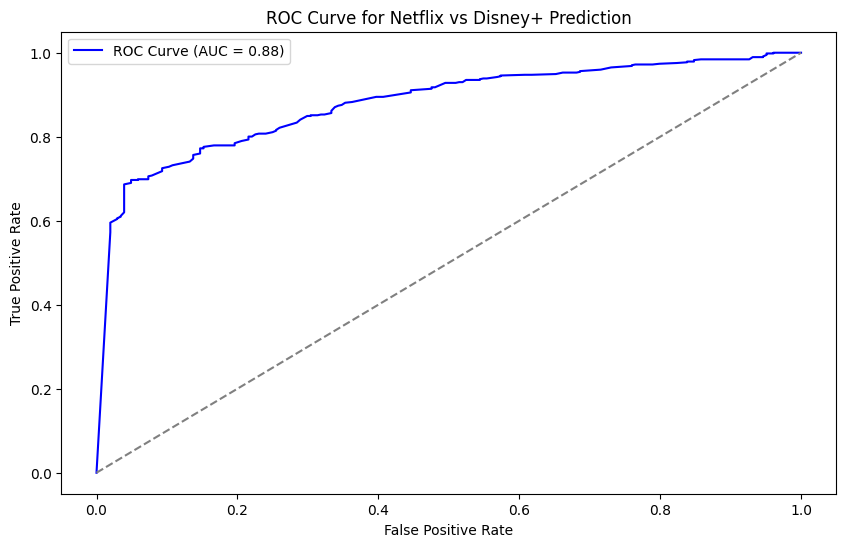

In [25]:
fpr, tpr, _ = roc_curve(y_test.map(lambda x: 1 if x == 'Netflix' else 0), y_prob)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Netflix vs Disney+ Prediction')
plt.legend()
plt.show()

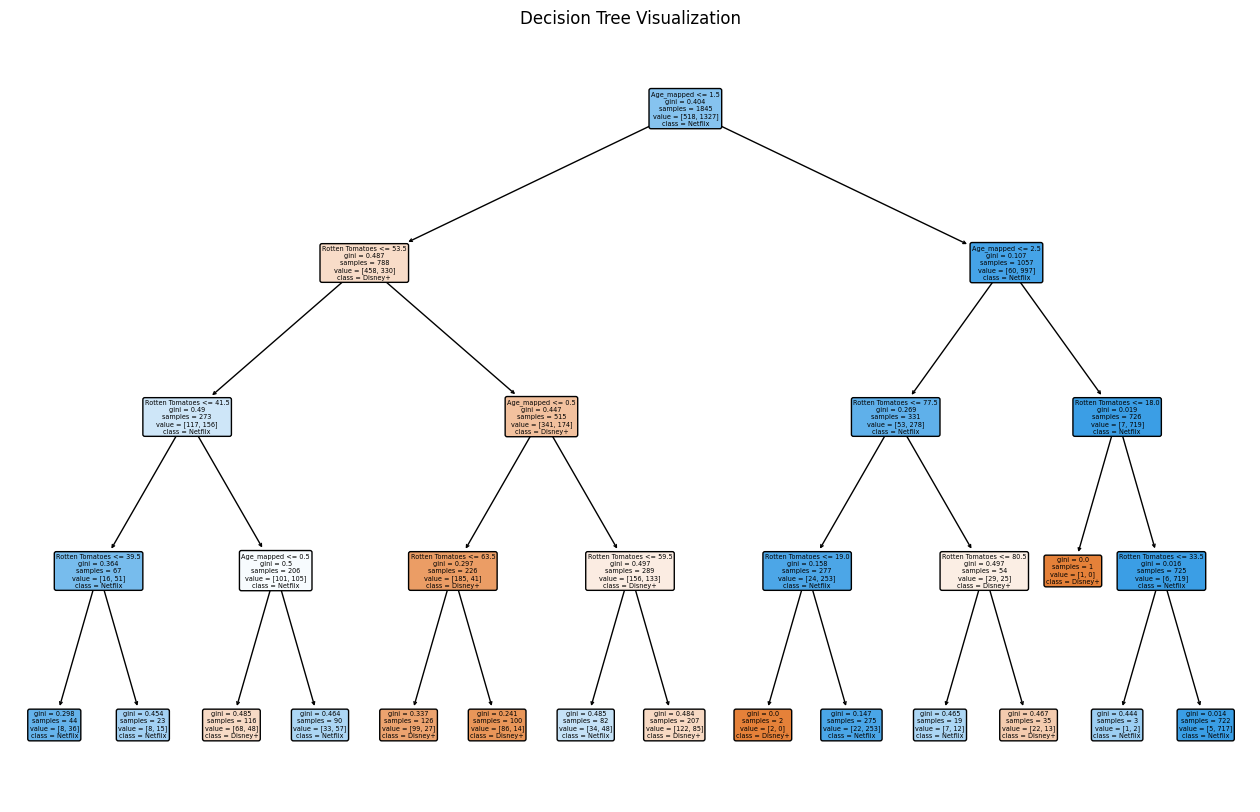

In [26]:
clf_tree = DecisionTreeClassifier(max_depth=4, random_state=42)
clf_tree.fit(X_train, y_train)
plt.figure(figsize=(16, 10))
plot_tree(clf_tree, feature_names=['Age_mapped', 'Rotten Tomatoes'], class_names=clf_tree.classes_, filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


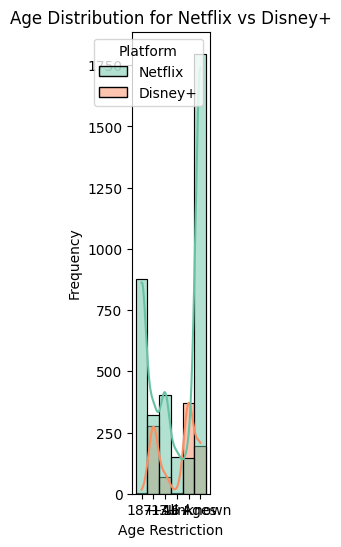

In [27]:
plt.figure(figsize=(1, 6))
sns.histplot(data=movies_filtered, x='Age', hue='Platform', kde=True, bins=10, palette='Set2')
plt.title('Age Distribution for Netflix vs Disney+')
plt.xlabel('Age Restriction')
plt.ylabel('Frequency')
plt.show()

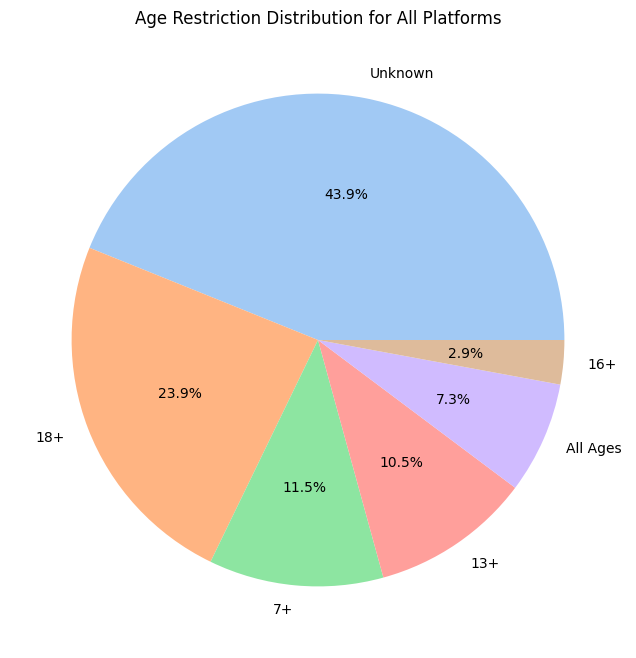

In [28]:
age_counts_all = movies_data['Age'].value_counts()
plt.figure(figsize=(8, 8))
age_counts_all.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Age Restriction Distribution for All Platforms')
plt.ylabel('')
plt.show()

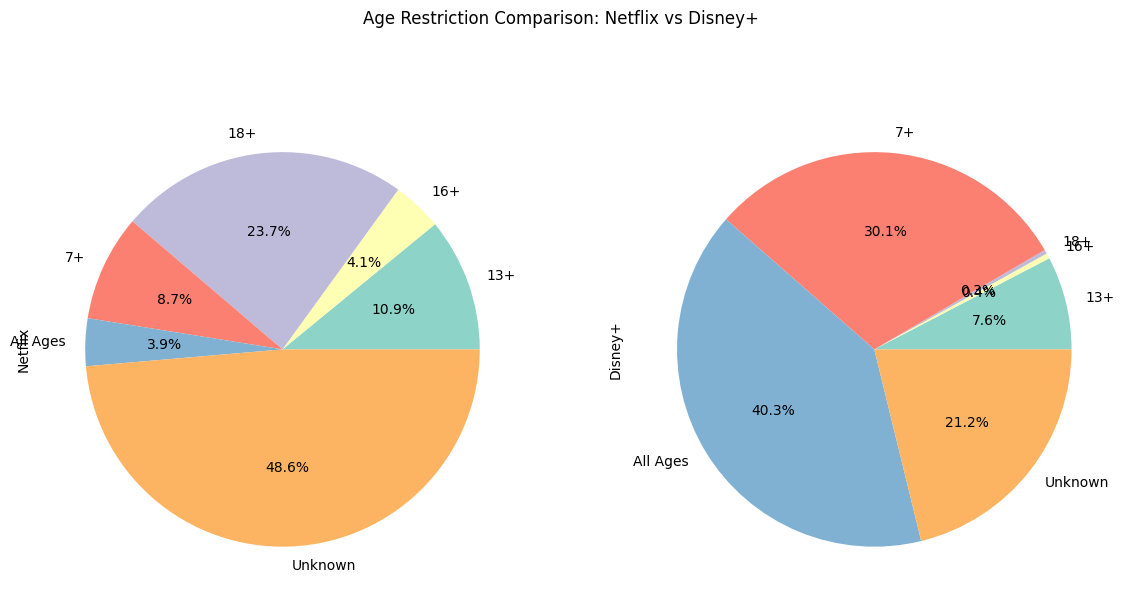

In [60]:
age_counts_netflix = netflix_movies['Age'].value_counts()
age_counts_disney = disney_movies['Age'].value_counts()
combined_age_counts = pd.DataFrame({
    'Netflix': age_counts_netflix,
    'Disney+': age_counts_disney
}).fillna(0)

combined_age_counts.plot(kind='pie', subplots=True, figsize=(14, 7), autopct='%1.1f%%', colors=sns.color_palette('Set3'), legend=False)
plt.suptitle('Age Restriction Comparison: Netflix vs Disney+')
plt.show()

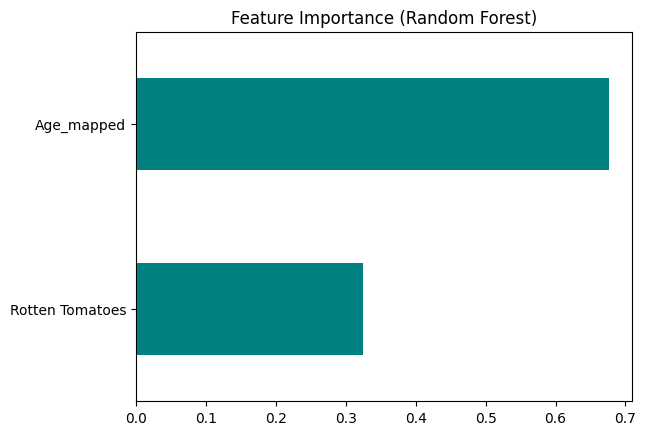

In [30]:
feature_importances = pd.Series(rf_clf.feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind='barh', color='teal', title='Feature Importance (Random Forest)')
plt.show()

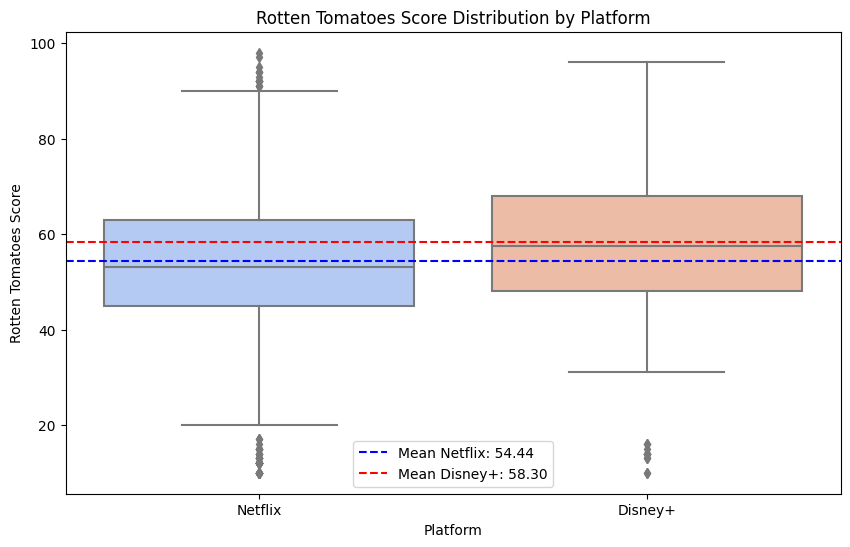

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=movies_filtered, x='Platform', y='Rotten Tomatoes', palette='coolwarm')
plt.title('Rotten Tomatoes Score Distribution by Platform')
plt.ylabel('Rotten Tomatoes Score')
plt.axhline(mean_netflix, color='blue', linestyle='--', label=f'Mean Netflix: {mean_netflix:.2f}')
plt.axhline(mean_disney, color='red', linestyle='--', label=f'Mean Disney+: {mean_disney:.2f}')
plt.legend()
plt.show()

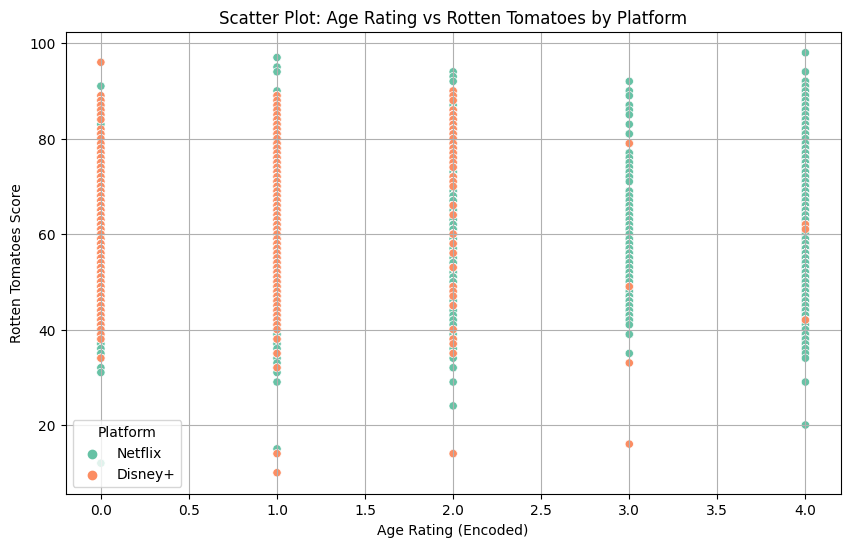

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=movies_filtered, x='Age_mapped', y='Rotten Tomatoes', hue='Platform', palette='Set2')
plt.title('Scatter Plot: Age Rating vs Rotten Tomatoes by Platform')
plt.xlabel('Age Rating (Encoded)')
plt.ylabel('Rotten Tomatoes Score')
plt.grid(True)
plt.show()

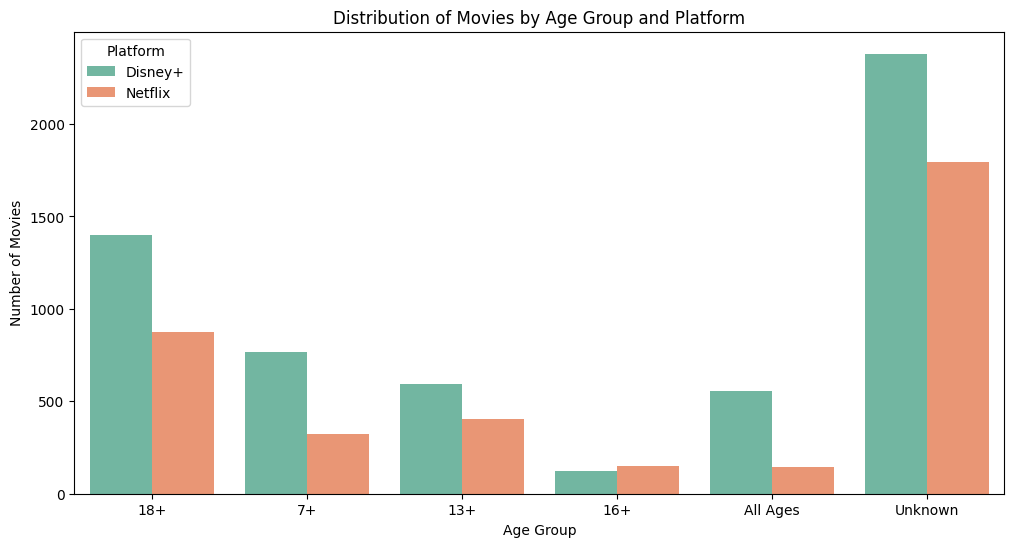

In [33]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Age', hue='Netflix', data=movies_data, palette='Set2')
plt.title('Distribution of Movies by Age Group and Platform')
plt.xlabel('Age Group')
plt.ylabel('Number of Movies')
plt.legend(title='Platform', labels=['Disney+', 'Netflix'])
plt.show()


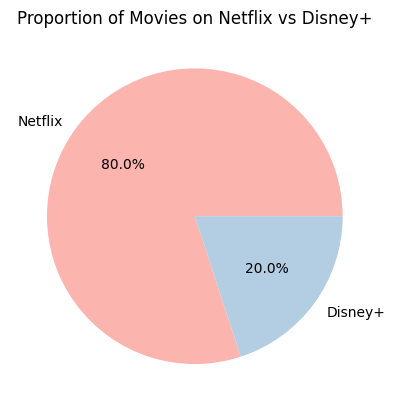

In [34]:
platform_counts = movies_data[['Netflix', 'Disney+']].sum()
platform_counts.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('Pastel1'), labels=['Netflix', 'Disney+'])
plt.title('Proportion of Movies on Netflix vs Disney+')
plt.ylabel('')  
plt.show()

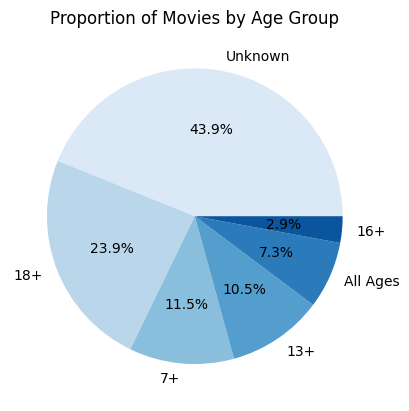

In [35]:
age_group_counts = movies_data['Age'].value_counts()
age_group_counts.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('Blues'))
plt.title('Proportion of Movies by Age Group')
plt.ylabel('')
plt.show()

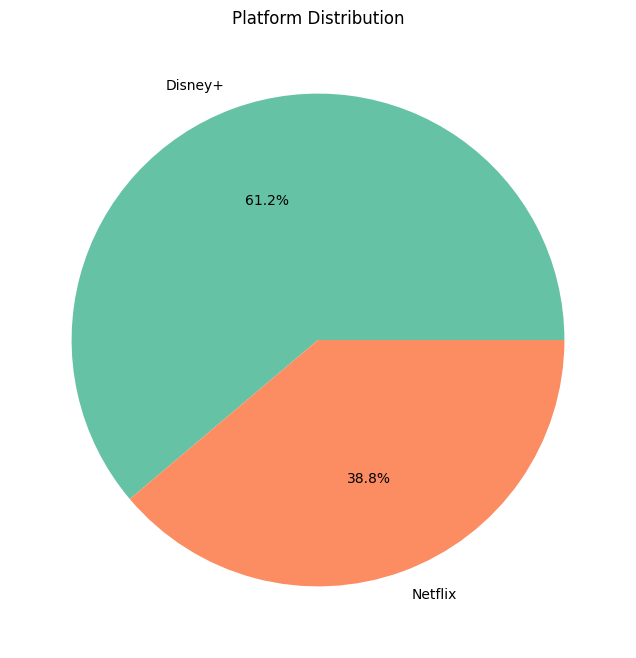

In [36]:
movies_data['Platform'] = np.where(movies_data['Netflix'] == 1, 'Netflix', 'Disney+')
plt.figure(figsize=(8, 8))
platform_pie = movies_data['Platform'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Platform Distribution')
plt.ylabel('')
plt.show()

In [37]:
# Mapping age restrictions to numeric values
age_map = {'all': 0, '7+': 7, '13+': 13, '16+': 16, '18+': 18}

# Apply the mapping and handle missing or invalid values
movies_filtered['Age_Num'] = movies_filtered['Age'].map(age_map)

# Drop rows where Age_Num is NaN
movies_filtered = movies_filtered.dropna(subset=['Age_Num'])

# Convert Age_Num to numeric type explicitly (if not already)
movies_filtered['Age_Num'] = movies_filtered['Age_Num'].astype(float)

# Verify the unique values in Age_Num
print(movies_filtered['Age_Num'].unique())


[18.  7. 13. 16.]


<ipython-input-37-11bd65905cb6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_filtered['Age_Num'] = movies_filtered['Age'].map(age_map)


In [38]:
from scipy.stats import shapiro

# Filter age data for each platform
netflix_age = movies_filtered[movies_filtered['Platform'] == 'Netflix']['Age_Num']
disney_age = movies_filtered[movies_filtered['Platform'] == 'Disney+']['Age_Num']

# Perform Shapiro-Wilk test
print("Shapiro Test for Age (Netflix):", shapiro(netflix_age))
print("Shapiro Test for Age (Disney+):", shapiro(disney_age))


Shapiro Test for Age (Netflix): ShapiroResult(statistic=0.7396931137604235, pvalue=4.030483196877546e-46)
Shapiro Test for Age (Disney+): ShapiroResult(statistic=0.5352833502616858, pvalue=1.7695215414683368e-29)


In [39]:
t_stat_age, p_value_age = mannwhitneyu(disney_age, netflix_age, alternative='less')
print(f"Mann-Whitney U Test for Age: t_stat={t_stat_age}, p_value={p_value_age}")


Mann-Whitney U Test for Age: t_stat=88268.5, p_value=4.854066060591717e-112


In [40]:
t_stat_rt, p_value_rt = ttest_ind(netflix_scores, disney_scores)
print(f"T-Test for Rotten Tomatoes: t_stat={t_stat_rt}, p_value={p_value_rt}")


T-Test for Rotten Tomatoes: t_stat=-7.545999504955166, p_value=5.3763409871194685e-14


In [41]:
netflix_scores = movies_filtered[movies_filtered['Platform'] == 'Netflix']['Rotten Tomatoes']
disney_scores = movies_filtered[movies_filtered['Platform'] == 'Disney+']['Rotten Tomatoes']


In [42]:
print("Dataset columns:", movies_data.columns)

if 'Netflix' in movies_data.columns and 'disney+' in movies_data.columns:
    netflix = movies_data[movies_data['Netflix'] == 1]
    disney = movies_data[movies_data['disney+'] == 1]

    if 'age' in netflix.columns and 'age' in disney.columns:
        # Visualizing Age Distribution
        plt.figure(figsize=(12, 6))
        sns.kdeplot(netflix['age'], label='Netflix', shade=True, color='blue')
        sns.kdeplot(disney['age'], label='Disney+', shade=True, color='orange')
        plt.title('Age Distribution: Netflix vs Disney+')
        plt.xlabel('Age Restriction')
        plt.ylabel('Density')
        plt.legend()
        plt.show()
    else:
        print("The 'age' column is missing in one or both filtered datasets.")
else:
    print("The required columns 'Netflix' or 'disney+' are missing in the dataset.")


Dataset columns: Index(['Unnamed: 0', 'ID', 'Title', 'Year', 'Age', 'Rotten Tomatoes',
       'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Type', 'Age_mapped',
       'Platform'],
      dtype='object')
The required columns 'Netflix' or 'disney+' are missing in the dataset.


In [62]:
import pandas as pd
import plotly.express as px

filtered_data = movies_data[(movies_data['Netflix'] == 1) | (movies_data['Disney+'] == 1)].copy()

filtered_data['Platform'] = filtered_data.apply(
    lambda row: 'Netflix' if row['Netflix'] == 1 else 'Disney+', axis=1
)

fig = px.scatter(
    filtered_data,
    x='Age',
    y='Rotten Tomatoes',
    color='Platform',
    hover_name='Title',
    title='Comparison of Age Restrictions and Rotten Tomatoes Scores on Netflix and Disney+',
    labels={'Age': 'Age Restriction', 'Rotten Tomatoes': 'Rotten Tomatoes Score'},
    color_discrete_map={'Netflix': 'red', 'Disney+': 'blue'}
)

fig.update_layout(
    xaxis_title='Age Restriction',
    yaxis_title='Rotten Tomatoes Score',
    legend_title='Platform',
    height=600
)

fig.show()


In [44]:
fig = px.box(
    filtered_data,
    x='Platform',
    y='Rotten Tomatoes',
    color='Platform',
    title='Comparison of Rotten Tomatoes Scores on Netflix and Disney+',
    labels={'Rotten Tomatoes': 'Rotten Tomatoes Score', 'Platform': 'Platform'},
    color_discrete_map={'Netflix': 'red', 'Disney+': 'blue'}
)

fig.update_layout(
    yaxis_title='Rotten Tomatoes Score',
    xaxis_title='Platform',
    legend_title='Platform',
    height=600
)

fig.show()


In [45]:
filtered_data = movies_data[(movies_data['Netflix'] == 1) | (movies_data['Disney+'] == 1)].copy()

filtered_data['Platform'] = filtered_data.apply(
    lambda row: 'Netflix' if row['Netflix'] == 1 else 'Disney+', axis=1
)

high_age_restriction = filtered_data[filtered_data['Age'] == '18+']

print("Movies with 18+ Rating:")
print(high_age_restriction[['Title', 'Platform', 'Age']])


Movies with 18+ Rating:
                                                  Title Platform  Age
0                                          The Irishman  Netflix  18+
4                                                  Roma  Netflix  18+
9                            The Trial of the Chicago 7  Netflix  18+
10                                           Article 15  Netflix  18+
11    Jim & Andy: The Great Beyond- Featuring a Very...  Netflix  18+
...                                                 ...      ...  ...
3623             Grego Rossello: disculpe las molestias  Netflix  18+
3634                       The Upshaws - The Afterparty  Netflix  18+
4131                                            The Kid  Disney+  18+
7653                                           The Swap  Disney+  18+
8985   Maggie Simpson in The Force Awakens from Its Nap  Disney+  18+

[880 rows x 3 columns]


<Figure size 1200x800 with 0 Axes>

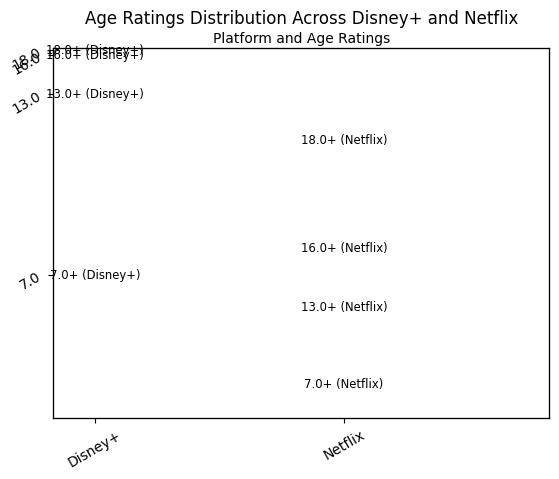

In [46]:
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt

# Step 1: Prepare the data for the mosaic plot
# Group by platform and age rating, and count occurrences
mosaic_data = movies_filtered.groupby(['Platform', 'Age_Num']).size().reset_index(name='Count')

# Convert the data to a dictionary format suitable for the mosaic plot
mosaic_dict = {
    (row['Platform'], row['Age_Num']): row['Count'] for _, row in mosaic_data.iterrows()
}

# Step 2: Define a color palette for the mosaic plot
color_palette = {
    ('Netflix', 0): '#FF9999',
    ('Netflix', 7): '#FFB266',
    ('Netflix', 13): '#FFCC99',
    ('Netflix', 16): '#FFD699',
    ('Netflix', 18): '#FFE6CC',
    ('Disney+', 0): '#66B2FF',
    ('Disney+', 7): '#99CCFF',
    ('Disney+', 13): '#CCE6FF',
    ('Disney+', 16): '#99E6E6',
    ('Disney+', 18): '#B3FFFF',
}

# Step 3: Plot the mosaic
plt.figure(figsize=(12, 8))
mosaic(
    mosaic_dict,
    title="Age Ratings Distribution Across Disney+ and Netflix",
    label_rotation=30,
    labelizer=lambda k: f"{k[1]}+ ({k[0]})",
    properties=lambda k: {'color': color_palette.get(k, '#FFFFFF')}
)
plt.xlabel("Platform and Age Ratings")
plt.ylabel("Proportions")
plt.show()


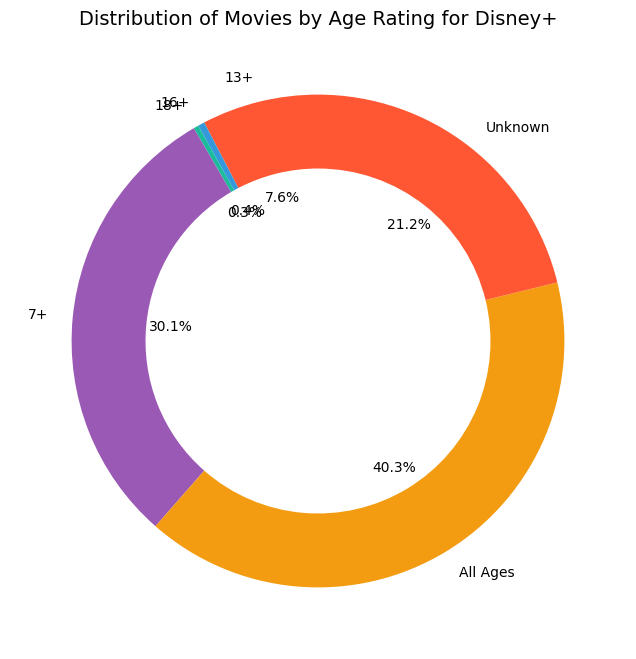

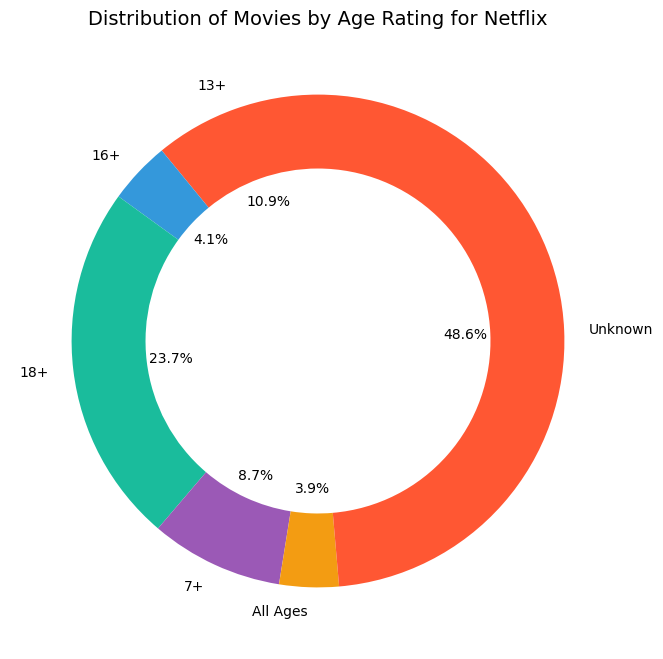

In [47]:
import matplotlib.pyplot as plt

# Group the data by 'Platform' and 'Age' to get counts of movies per platform and age rating
age_platform_counts = filtered_data.groupby(['Platform', 'Age']).size().unstack(fill_value=0)

# Create a doughnut chart for each platform
for platform in age_platform_counts.index:
    # Get the counts of movies by age rating for the current platform
    platform_data = age_platform_counts.loc[platform]

    # Create the doughnut chart
    plt.figure(figsize=(8, 8))
    plt.pie(platform_data, labels=platform_data.index, autopct='%1.1f%%', startangle=90, 
            colors=['#FF5733', '#3498DB', '#1ABC9C', '#9B59B6', '#F39C12'], wedgeprops={'width': 0.3})

    # Add title
    plt.title(f'Distribution of Movies by Age Rating for {platform}', fontsize=14)
    
    # Display the plot
    plt.show()


In [48]:
import plotly.express as px

age_distribution = filtered_data.groupby(['Age', 'Platform']).size().reset_index(name='Count')

fig = px.bar(
    age_distribution,
    x='Age',
    y='Count',
    color='Platform',
    barmode='group',
    title='Distribution of Age Restrictions on Netflix and Disney+',
    labels={'Age': 'Age Restriction', 'Count': 'Number of Movies'},
    color_discrete_map={'Netflix': '#B6A6E9', 'Disney+': '#AFDC8F'}
)

fig.update_layout(
    xaxis_title='Age Restriction',
    yaxis_title='Number of Movies',
    legend_title='Platform',
    height=600
)

fig.show()
